In [62]:
from collections import Counter 

from load import load_data
from statistics import present_most_common
from visualize import scatter_plot

import numpy as np
from MulticoreTSNE import MulticoreTSNE as TSNE
from gensim.models import Phrases, Word2Vec

%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [21]:
sentence_stream = load_data(0.01)

115it [00:00, 286.43it/s]                        
100%|██████████| 400/400 [00:00<00:00, 458.45it/s]


In [22]:
sentence_stream[0]

['orzeczeniez',
 'dnia',
 'maja',
 'r',
 'u',
 'r',
 'trybunał',
 'konstytucyjny',
 'w',
 'składzie',
 'przewodniczący',
 'sędzia',
 'tk',
 'kazimierz',
 'działochasędziowie',
 'tk',
 'remigiusz',
 'orzechowski',
 'stanisław',
 'pawela',
 'sprawozdawca',
 'protokolanci',
 'ewa',
 'popławska',
 'kośla',
 'i',
 'jerzy',
 'adam',
 'porowskipo',
 'rozpoznaniu',
 'w',
 'dniach',
 'i',
 'kwietnia',
 'oraz',
 'maja',
 'r',
 'na',
 'rozprawie',
 'z',
 'udziałem',
 'uczestników',
 'postępowania',
 'umocowanych',
 'przedstawicieli',
 'rady',
 'ministrów',
 'i',
 'umocowanego',
 'przedstawiciela',
 'prokuratora',
 'generalnego',
 'prl',
 'sprawy',
 'z',
 'wniosku',
 'prezydium',
 'wojewódzkiej',
 'rady',
 'narodowej',
 'we',
 'wrocławiu',
 'o',
 'wydanie',
 'orzeczenia',
 'stwierdzającego',
 'niezgodność',
 'a',
 'rozporządzenia',
 'rady',
 'ministrów',
 'z',
 'dnia',
 'września',
 'r',
 'w',
 'sprawie',
 'szczegółowych',
 'zasad',
 'i',
 'trybu',
 'oddawania',
 'w',
 'użytkowanie',
 'wieczyste',

In [23]:
bigrams = Phrases(sentence_stream)
bigrams.save('bigrams')

trigrams = Phrases(bigrams[sentence_stream])
trigrams.save('trigrams')

/home/maciej/.virtualenvs/nlp/lib/python3.6/site-packages/gensim/models/phrases.py:494: UserWarning: For a faster implementation, use the gensim.models.phrases.Phraser class
  warnings.warn("For a faster implementation, use the gensim.models.phrases.Phraser class")


In [24]:
present_most_common(bigrams, dash_count=1)

z_dnia -> 7332
art_ust -> 3466
art_k -> 2925
z_art -> 2338
w_dniu -> 2266
w_sprawie -> 2249
nr_poz -> 2120
na_podstawie -> 2033
w_tym -> 1985
ustawy_z -> 1895


In [25]:
present_most_common(trigrams, dash_count=2)

art_k_c -> 1056
art_k_p_c -> 898
art_ust_ustawy -> 872
r_nr_poz -> 774
dz_u_nr_poz -> 735
z_dnia_września -> 730
z_dnia_kwietnia -> 708
dnia_kwietnia_r -> 703
z_dnia_grudnia -> 697
dnia_września_r -> 695


In [26]:
updated_sentence_stream = [trigrams[sentence] for sentence in sentence_stream]

/home/maciej/.virtualenvs/nlp/lib/python3.6/site-packages/gensim/models/phrases.py:494: UserWarning: For a faster implementation, use the gensim.models.phrases.Phraser class
  warnings.warn("For a faster implementation, use the gensim.models.phrases.Phraser class")


In [27]:
updated_sentence_stream[0]

['orzeczeniez',
 'dnia_maja',
 'r',
 'u',
 'r',
 'trybunał_konstytucyjny',
 'w',
 'składzie_przewodniczący',
 'sędzia_tk',
 'kazimierz',
 'działochasędziowie',
 'tk',
 'remigiusz_orzechowski',
 'stanisław_pawela',
 'sprawozdawca',
 'protokolanci',
 'ewa_popławska',
 'kośla',
 'i',
 'jerzy',
 'adam',
 'porowskipo',
 'rozpoznaniu',
 'w',
 'dniach',
 'i',
 'kwietnia',
 'oraz',
 'maja_r',
 'na_rozprawie',
 'z_udziałem',
 'uczestników_postępowania',
 'umocowanych',
 'przedstawicieli_rady',
 'ministrów',
 'i',
 'umocowanego',
 'przedstawiciela',
 'prokuratora_generalnego',
 'prl',
 'sprawy',
 'z',
 'wniosku_prezydium',
 'wojewódzkiej_rady',
 'narodowej_we',
 'wrocławiu',
 'o_wydanie',
 'orzeczenia_stwierdzającego',
 'niezgodność',
 'a',
 'rozporządzenia_rady',
 'ministrów_z',
 'dnia_września',
 'r',
 'w',
 'sprawie_szczegółowych',
 'zasad',
 'i',
 'trybu_oddawania',
 'w',
 'użytkowanie_wieczyste',
 'gruntów',
 'i',
 'sprzedaży_nieruchomości',
 'państwowych_kosztów',
 'i',
 'rozliczeń',
 'z',

In [28]:
# model = Word2Vec(
#     sentences=updated_sentence_stream, 
#     window=5, 
#     size=300,
#     workers=8,
#     min_count=3
# )
# model.save('word2vec')

In [3]:
model = Word2Vec.load('word2vec')

In [4]:
word_vectors = model.wv
del model

In [5]:
word_vectors

In [7]:
expressions = [
    "sąd_najwyższy", 
    "trybunał_konstytucyjny", 
    "kodeks_cywilny",
    "kpk", 
    "sąd_rejonowy",
    "szkoda", 
    "wypadek", 
    "kolizja",
    "szkoda_majątkowa", 
    "nieszczęście", 
    "rozwód"
]

In [9]:
for expression in expressions:
    print(expression)
    try:
        similar_expressions = word_vectors.most_similar(expression)
        for similar in similar_expressions:
            print("\t{}".format(similar))
    except KeyError:
        print("\tnot in the vocabulary")

sąd_najwyższy
	('lex_nr', 0.9792487025260925)
	('v_csk', 0.9788300395011902)
	('uchwale', 0.9745216369628906)
	('rozporządzenie', 0.9725874662399292)
	('ust_rozporządzenia', 0.9654710292816162)
	('i_aca', 0.9631469249725342)
	('ministrów', 0.9627195596694946)
	('postanowieniu_trybunału', 0.9622988700866699)
	('wydanym', 0.9620305895805359)
	('sprawie_ordynacji', 0.9583668112754822)
trybunał_konstytucyjny
	('zmienił_zaskarżony', 0.935376763343811)
	('zmienił_zaskarżoną', 0.9205400347709656)
	('zaoczny', 0.9051932096481323)
	('sąd_okręgowy', 0.8946862816810608)
	('ustalił', 0.8934791088104248)
	('zmieniony', 0.8892807364463806)
	('oddaleniem_powództwa', 0.8770341873168945)
	('wyroku', 0.8746404647827148)
	('sprostował', 0.873049795627594)
	('ustalił_stan', 0.8729326725006104)
kodeks_cywilny
	('kodeks_postępowania', 0.9915336966514587)
	('przepisów_wprowadzających', 0.9878418445587158)
	('cyt', 0.9853206872940063)
	('następne', 0.9833465218544006)
	('rp', 0.9832773208618164)
	('karę_łączn

In [13]:
word_vectors.most_similar(positive=['sąd_najwyższy', 'konstytucja'], negative=['kpc'], topn=1)

[('stwierdzającej', 0.9589627385139465)]

In [15]:
word_vectors.most_similar(positive=['pasażer', 'kobieta'], negative=['mężczyzna'], topn=1)

[('dyrektorem', 0.9806908369064331)]

In [17]:
word_vectors.most_similar(positive=['samochód', 'rzeka'], negative=['droga'], topn=1)

KeyError: "word 'rzeka' not in vocabulary"

In [19]:
X = np.array([[0, 0, 0], [0, 1, 1], [1, 0, 1], [1, 1, 1]])
X_embedded = TSNE(n_components=2).fit_transform(X)
X_embedded.shape


(4, 2)

In [64]:
vectors = ['szkoda',
 'strata',
 'uszczerbek',
#  'szkoda_majątkowa',
#  'uszczerbek_na_zdrowiu',
#  'krzywda',
#  'niesprawiedliwość',
#  'nieszczęście'
          ]

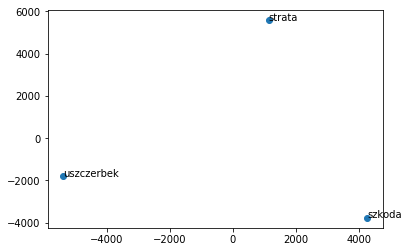

In [68]:
X = np.array([word_vectors[x] for x in vectors])
X_transformed = TSNE(n_components=2, n_jobs=8).fit_transform(X)

scatter_plot(X_transformed, labels=vectors)

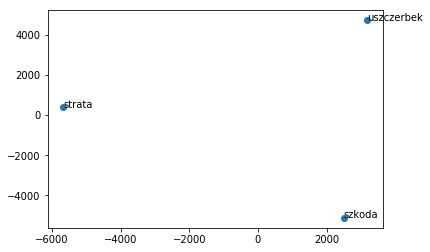

In [73]:
X_whole = TSNE(n_components=2, n_jobs=8).fit(word_vectors.vectors)
X_transformed_from_all = X_whole.fit_transform(word_vectors[vectors])

scatter_plot(X_transformed_from_all, labels=vectors)